In [1]:
# imports

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

import matplotlib.pyplot as plt

In [2]:
# import load_data function from loadData.py
from loadData import load_data

train_data, train_labels, test_data, test_labels = load_data()


# type of train_data
print("train_data")
print(type(train_data))
print(train_data.shape)

# type of train_labels
print("train_labels")
print(type(train_labels))
print(train_labels.shape)

# type of test_data
print("test_data")
print(type(test_data))
print(test_data.shape)

# type of test_labels
print("test_labels")
print(type(test_labels))
print(test_labels.shape)

Loading data
Data loaded
train_data
<class 'torch.Tensor'>
torch.Size([60000, 784])
train_labels
<class 'torch.Tensor'>
torch.Size([60000])
test_data
<class 'torch.Tensor'>
torch.Size([10000, 784])
test_labels
<class 'torch.Tensor'>
torch.Size([10000])


In [3]:
# Custom dataset class
class CSVDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        x = self.data[index]
        y = self.labels[index]
        return x, y


In [4]:
# define the network class

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.flatten(x, -1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [5]:
# define the training function

def train(model, train_loader, criterion, optimizer, epochs):
    loss_list = []
    for epoch in range(epochs):
        print("Epoch: " + str(epoch))
        for input, data in enumerate(train_loader):
            input, labels = data
            optimizer.zero_grad()
            output = model(input)
            loss = criterion(output, labels)
            loss_list.append(loss.item())
            loss.backward()
            optimizer.step()
            if epoch % 10 == 0:
                print("Epoch: " + str(epoch) + ", Loss: " + str(loss.item()))

    # use matplotlib to plot the loss
    plt.plot(loss_list)
                
    print("Finished Training")

In [6]:
# define the testing function

def test(model, test_loader):
    correct = 0
    total = 0

    with torch.no_grad():
        for data, labels in test_loader:
            output = model(data)
            _, predicted = torch.max(output.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    print(f"Accuracy: {correct / total}")

In [7]:
# data loader
train_dataset = CSVDataset(train_data, train_labels)
test_dataset = CSVDataset(test_data, test_labels)

train_loader = DataLoader(train_dataset, batch_size=1000, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=True)

In [8]:
# create an instance of the network
model = Net()

# define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# run one forward and backward pass on the first item in the train_loader
model.forward(train_data[0])


tensor([ 0.0845,  0.0799, -0.0156,  0.1094,  0.1351, -0.0535, -0.0662,  0.0671,
        -0.0670,  0.0512], grad_fn=<AddBackward0>)

Epoch: 0
Epoch: 0, Loss: 2.304075241088867
Epoch: 0, Loss: 2.3035478591918945
Epoch: 0, Loss: 2.3012795448303223
Epoch: 0, Loss: 2.301431894302368
Epoch: 0, Loss: 2.2981643676757812
Epoch: 0, Loss: 2.299227476119995
Epoch: 0, Loss: 2.29866623878479
Epoch: 0, Loss: 2.3013999462127686
Epoch: 0, Loss: 2.302234172821045
Epoch: 0, Loss: 2.3038406372070312
Epoch: 0, Loss: 2.302813768386841
Epoch: 0, Loss: 2.3041956424713135
Epoch: 0, Loss: 2.2998759746551514
Epoch: 0, Loss: 2.302529811859131
Epoch: 0, Loss: 2.298525094985962
Epoch: 0, Loss: 2.3013298511505127
Epoch: 0, Loss: 2.2992355823516846
Epoch: 0, Loss: 2.2961764335632324
Epoch: 0, Loss: 2.2957749366760254
Epoch: 0, Loss: 2.295971632003784
Epoch: 0, Loss: 2.2993109226226807
Epoch: 0, Loss: 2.29811429977417
Epoch: 0, Loss: 2.297520399093628
Epoch: 0, Loss: 2.2976796627044678
Epoch: 0, Loss: 2.2952916622161865
Epoch: 0, Loss: 2.2939279079437256
Epoch: 0, Loss: 2.29195237159729
Epoch: 0, Loss: 2.298081159591675
Epoch: 0, Loss: 2.297534704

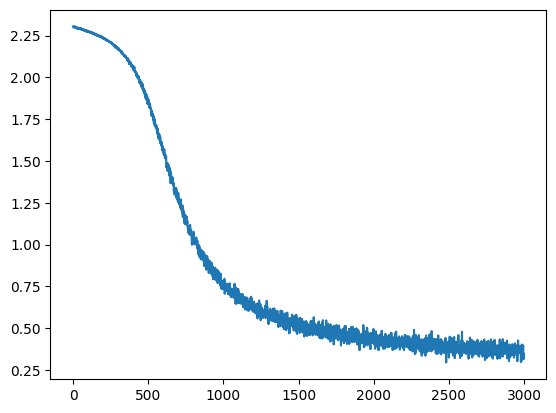

In [9]:
# train the network
train(model, train_loader, criterion, optimizer, 50)

# test the network
test(model, test_loader)

In [10]:
print(test_labels[0])
model.forward(test_data[0])

tensor(7)


tensor([ 0.2429, -5.1115, -0.6407,  2.8504, -3.1129, -1.1877, -8.8859,  9.0655,
        -1.0233,  4.1059], grad_fn=<AddBackward0>)

In [13]:
import csv

user_input = []
with open('user_input.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        for i in range(0, len(row)):
            row[i] = float(row[i])/255
        user_input.append(row)

user_input = torch.tensor(user_input)
print(user_input.shape)


torch.Size([1, 784])


In [16]:
prediction = model.forward(user_input[0])
print(prediction)
# print index of max value
print(torch.argmax(prediction).item())

tensor([-2.2361,  1.2512,  1.3996,  6.0841, -4.9436,  1.0619, -5.8037,  0.6369,
         1.5868, -0.3302], grad_fn=<AddBackward0>)
3
